# Operaciones basicas

In [8]:
import numpy as np

escalar = 99
matriz = np.array([[1,2,3],[4,5,6],[7,8,9]])
matriz2 = np.array([[5,77,3],[4,55,6],[7,65,9]])
vector = np.array([1,2,3])
tensor = np.array([
    [[0,153,0],[255,255,255],[255,0,0]],
    [[0,153,0],[102,51,0],[255,0,0]],
    [[0,153,0],[255,255,255],[255,0,0]],
])

## Transposición
Definimos a la **matriz transpuesta** como la matriz a la que le invertimos las filas por las columnas. Si teníamos una matriz de dimensiones *mxn* su transpuesta será una matriz de dimensión *nxm*.

La transpuesta tiene propiedades nos va a ayudar en las operaciones. Por ejemplo, para dividir sobre una matriz. 

Podemos ajustar el formato de los datos a nuestra conveniencia.

- El arreglo transpuesto se encuentra guardado en el atributo .T
- Por convención denotamos al transpuesto con un subíndice _t
- Sintaxis = A_t = A.T

Un **tensor también se puede transponer** en este caso se intercambiaran los elementos de manera que la jerarquía quede invertida. Sea un tensor de *mxnxp* el **tensor transpuesto** tendrá una dimensión de *pxnxm*

**Matriz**

In [2]:
print('Sin T:',matriz)
print('-'*50)
print('Con T',matriz.T)

Sin T: [[1 2 3]
 [4 5 6]
 [7 8 9]]
--------------------------------------------------
Con T [[1 4 7]
 [2 5 8]
 [3 6 9]]


**Tensor**

In [3]:
print('Sin T:',tensor)
print('-'*50)
print('Con T',tensor.T)

Sin T: [[[  0 153   0]
  [255 255 255]
  [255   0   0]]

 [[  0 153   0]
  [102  51   0]
  [255   0   0]]

 [[  0 153   0]
  [255 255 255]
  [255   0   0]]]
--------------------------------------------------
Con T [[[  0   0   0]
  [255 102 255]
  [255 255 255]]

 [[153 153 153]
  [255  51 255]
  [  0   0   0]]

 [[  0   0   0]
  [255   0 255]
  [  0   0   0]]]


## Suma de matrices y escalares:
Para la suma entre matrices, las 2 matrices deben tener la misma cantidad de filas y columnas (es decir, el mismo *mxn*). Se suma cada elemento de una matriz con su respectivo elemento de la otra matriz. 

In [4]:
matriz + matriz2

array([[ 6, 79,  6],
       [ 8, 60, 12],
       [14, 73, 18]])

## Broadcasting

Extender la dimension de menor tamaño para completar la de mayor tamaño.

Para la suma entre un **escalar** con una **matriz**, se suma el escalar por cada valor de la matriz.
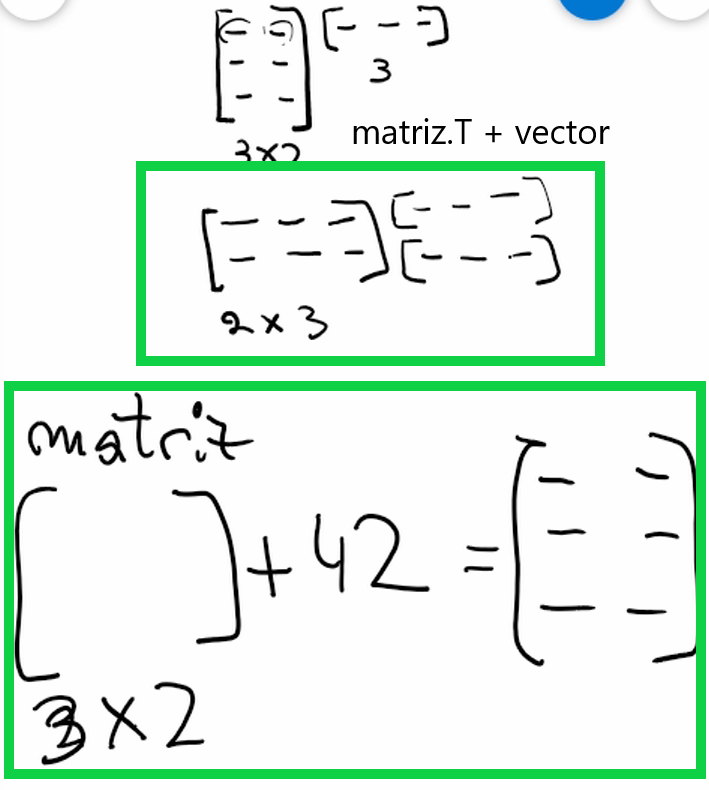

In [7]:
matriz.T + vector

array([[ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

Suma Matriz con Escalar

In [5]:
matriz+ escalar

array([[100, 101, 102],
       [103, 104, 105],
       [106, 107, 108]])

### Producto interno

Producto interno entre una matriz y un vector.
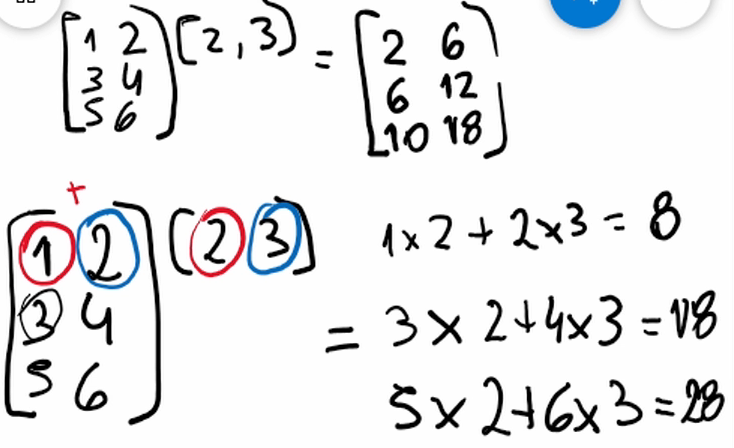

**Opcion 1**:

In [10]:
vector = np.array([2,3])
matriz = np.array([[1,2],[3,4],[5,6]])
matriz.dot(vector)

array([ 8, 18, 28])

**Opcion 2**:

In [11]:
np.dot(matriz,vector)

array([ 8, 18, 28])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e75321e8-1037-437c-8037-4042716c25af' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>